In [108]:
import nltk
import string
from nltk import word_tokenize, CFG, ChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser
# nltk.download('punkt')

In [109]:
original_sentence = "Lazy cats play with mice."
# [S [NP [JJ] [NNS]] [VP [Vt] [IN] [NNS]]]
# original grammar (example)
"""
grammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small"
  CC  -> "and" | "or"
  ''')"""
# our extended grammar: basically, we added rules for VP and some terminal symbols
grammar = CFG.fromstring('''
    S -> NP VP | NP
    NP -> NNS | JJ NNS | NP CC NP
    VP -> Vt IN NNS
    NNS -> 'cats' | 'dogs' | 'mice' | NNS CC NNS
    JJ -> 'big' | 'small' | 'lazy'
    CC -> 'and' | 'or'
    IN -> 'with'
    Vt -> 'play'
    ''')

In [110]:
def remove_punctuation(token):
    res = ''
    for c in token:
        if c not in string.punctuation:
            res += c
    return res

sent = word_tokenize(remove_punctuation(original_sentence.lower()))

In [119]:
parsers = {}
parsers['ChartParser'] = ChartParser(grammar)
parsers['BottomUpChartParser'] =  BottomUpChartParser(grammar)
parsers['BottomUpLeftCornerChartParser'] = BottomUpLeftCornerChartParser(grammar)
parsers['LeftCornerChartParser'] = LeftCornerChartParser(grammar)

parse = {}
for name, parser in parsers.items():
    for t in parser.parse(sent):
        parse[name] = t


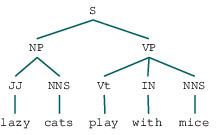

In [120]:
parse['ChartParser']

In [121]:
parsed = parsers['ChartParser'].chart_parse(sent)
print("num edges for the ChartParser:", parsed.num_edges())
parsed.edges()

num edges for the ChartParser: 30


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] S  -> NP *],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP *],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [2:3] Vt -> 'play' *],
 [Edge: [2:3] VP -> Vt * IN NNS],
 [Edge: [3:4] IN -> 'with' *],
 [Edge: [2:4] VP -> Vt IN * NNS],
 [Edge: [4:5] NNS -> 'mice' *],
 [Edge: [4:5] NP -> NNS *],
 [Edge: [4:5] NNS -> NNS * CC NNS],
 [Edge: [2:5] VP -> Vt IN NNS *],
 [Edge: [0:5] S  -> NP VP *],
 [Edge: [1:5] S  -> NP VP *],
 [Edge: [4:5] S  -> NP * VP],
 [Edge: [4:5] S  -> NP *],
 [Edge: [4:5] NP -> NP * CC NP]]

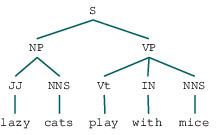

In [101]:
parse['BottomUpChartParser']

In [102]:
parsed = parsers['BottomUpChartParser'].chart_parse(sent)
print("num edges for the BottomUpChartParser:", parsed.num_edges())
parsed.edges()

num edges for the BottomUpChartParser: 50


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:0] JJ -> * 'lazy'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:0] NP -> * JJ NNS],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:1] NNS -> * 'cats'],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:1] NP -> * NNS],
 [Edge: [1:1] NNS -> * NNS CC NNS],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [1:1] S  -> * NP VP],
 [Edge: [1:1] S  -> * NP],
 [Edge: [1:1] NP -> * NP CC NP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP *],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [0:0] S  -> * NP VP],
 [Edge: [0:0] S  -> * NP],
 [Edge: [0:0] NP -> * NP CC NP],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] S  -> NP *],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [2:2] Vt -> * 'play'],
 [Edge: [2:3] Vt -> 'play' *],
 [Edge: [2:2] VP -> * Vt IN NNS],
 [Edge: [2:3] VP -> Vt * IN NNS],
 [Edge: [3:3] IN -> * 'with'],
 [Edge: [3:4] IN 

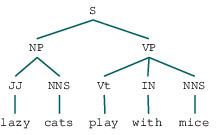

In [103]:
parse['BottomUpLeftCornerChartParser']

In [104]:
parsed = parsers['BottomUpLeftCornerChartParser'].chart_parse(sent)
print("num edges for the BottomUpLeftCornerChartParser:", parsed.num_edges())
parsed.edges()

num edges for the BottomUpLeftCornerChartParser: 30


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] S  -> NP *],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP *],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [2:3] Vt -> 'play' *],
 [Edge: [2:3] VP -> Vt * IN NNS],
 [Edge: [3:4] IN -> 'with' *],
 [Edge: [2:4] VP -> Vt IN * NNS],
 [Edge: [4:5] NNS -> 'mice' *],
 [Edge: [4:5] NP -> NNS *],
 [Edge: [4:5] NNS -> NNS * CC NNS],
 [Edge: [2:5] VP -> Vt IN NNS *],
 [Edge: [0:5] S  -> NP VP *],
 [Edge: [1:5] S  -> NP VP *],
 [Edge: [4:5] S  -> NP * VP],
 [Edge: [4:5] S  -> NP *],
 [Edge: [4:5] NP -> NP * CC NP]]

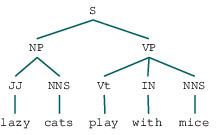

In [105]:
parse['LeftCornerChartParser']

In [106]:
parsed = parsers['LeftCornerChartParser'].chart_parse(sent)
print("num edges for the LeftCornerChartParser:", parsed.num_edges())
parsed.edges()

num edges for the LeftCornerChartParser: 24


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] S  -> NP *],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP *],
 [Edge: [2:3] Vt -> 'play' *],
 [Edge: [2:3] VP -> Vt * IN NNS],
 [Edge: [3:4] IN -> 'with' *],
 [Edge: [2:4] VP -> Vt IN * NNS],
 [Edge: [4:5] NNS -> 'mice' *],
 [Edge: [4:5] NP -> NNS *],
 [Edge: [2:5] VP -> Vt IN NNS *],
 [Edge: [0:5] S  -> NP VP *],
 [Edge: [1:5] S  -> NP VP *],
 [Edge: [4:5] S  -> NP *]]

[Edge: [0:1] 'lazy']